In [3]:
import pandas
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp

In [4]:
%matplotlib inline

Load rotation curve data for N3877 (https://arxiv.org/abs/astro-ph/0101404v1)

In [5]:
rot_df=pandas.read_csv('N3877.csv', sep=',')

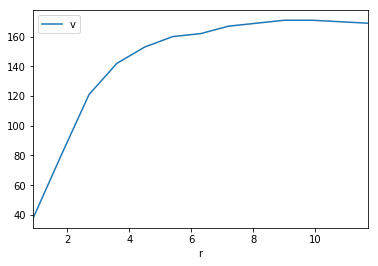

In [6]:
rot_df.plot(x='r')

In [161]:
rho0 = 2e-6
Rmax = 50
G=6.67E-11
kpc=3.09E+19
Mway=1.00E+11
Msun=2.00E+30

# Holochronous density profile

$\rho(R) =\dfrac{\rho_0 R_0^3}{2k} \left({\frac{1}{R^2}-\frac{1}{R_0^2}} \right) $

In [162]:
x = np.linspace(50,0.5,100) # 100 linearly spaced numbers
y = rho0 * Rmax**3 * (-1/Rmax + 1/x)
m1 = 2 * np.pi * rho0 * Rmax**3 * (x *(1-x**2 /(3 * Rmax**2)))
v1= np.sqrt(m1*G*Mway*Msun/(x*kpc*1000))/1000
phi = m1/x

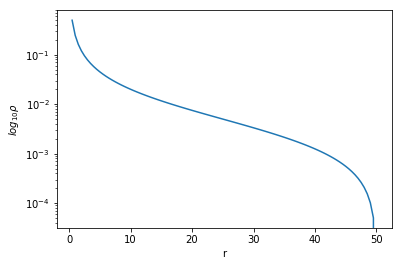

In [163]:
plt.plot(x,y)
plt.yscale('log')
plt.xlabel('r')
plt.ylabel(r'$log_{10} \rho$')
plt.show()

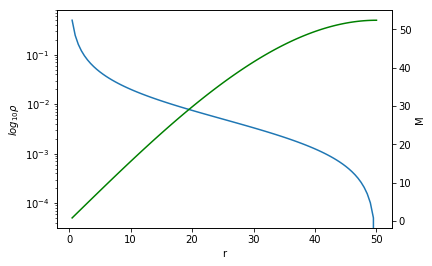

In [164]:
plt.close('all')
fig,ax1 = plt.subplots()
ax1.plot(x,y)
plt.xlabel('r')
plt.ylabel(r'$log_{10} \rho$')
plt.yscale('log')
ax2 = ax1.twinx()
ax2.set_ylabel('M')
ax2.plot(x,m1, color='g')
plt.show()

# NFW density profile

$\rho (r)={\dfrac {\rho _{0}}{{\frac {r}{R_{s}}}\left(1~+~{\frac {r}{R_{s}}}\right)^{2}}}$
where ρ0 and the "scale radius", Rs, are parameters which vary from halo to halo.


${\displaystyle M=\int _{0}^{R_{\max }}4\pi r^{2}\rho (r)\,dr=4\pi \rho _{0}R_{s}^{3}\left[\ln \left({\frac {R_{s}+R_{\max }}{R_{s}}}\right)-{\frac {R_{\max }}{R_{s}+R_{\max }}}\right]}$

The total mass is divergent, but it is often useful to take the edge of the halo to be the virial radius, Rvir, which is related to the "concentration parameter", c, and scale radius via

${\displaystyle R_{\mathrm {vir} }=cR_{s}}$

The virial radius is often referred to as ${\displaystyle R_{200}} $, and is defined as the radius at which the average density within this radius is 200 times the critical density. In this case, the total mass in the halo is

${\displaystyle M=\int _{0}^{R_{\mathrm {vir} }}4\pi r^{2}\rho (r)\,dr=4\pi \rho _{0}R_{s}^{3}\left[\ln(1+c)-{\frac {c}{1+c}}\right]} $

In [172]:
rho0 = 1e-4
Rs = 50
c= 5
#x = np.linspace(50,1,98) # 100 linearly spaced numbers
y = rho0 / (x/Rs * (1+x/Rs)**2)
m2 = 4 * np.pi * rho0 * Rs**3 * (np.log((Rs+x)/Rs) -x/(Rs+x))
v2= np.sqrt(m*G*Mway*Msun/(x*kpc*1000))/1000

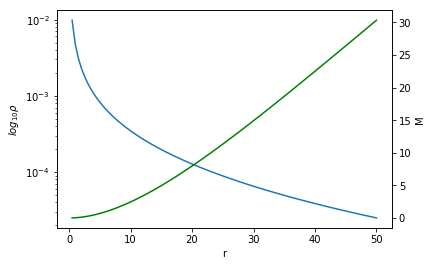

In [173]:
plt.close('all')
fig,ax1 = plt.subplots()
ax1.plot(x,y)
plt.xlabel('r')
plt.ylabel(r'$log_{10} \rho$')
plt.yscale('log')
ax2 = ax1.twinx()
ax2.set_ylabel('M')
ax2.plot(x,m2, color='g')
plt.show()

## Note
Neeed to follow up Cuspy halo problem

# Einasto Profile

The Einasto profile possesses a power law logarithmic slope of the form:

${\displaystyle \gamma (r)\equiv -{\frac {\operatorname {d} \ln \rho (r)}{\operatorname {d} \ln r}}\propto r^{\alpha }} $

which can be rearranged to give

${\displaystyle \rho (r)\propto \exp {(-Ar^{\alpha })}.}$ 

The parameter ${\displaystyle \alpha } $  controls the degree of curvature of the profile. This can be seen by computing the slope on a log-log plot:

${\displaystyle d\ (\log \rho )/d\ (\log r)\propto -r^{\alpha }.} $

In [136]:
rho0 = 1e-2
A=5
alpha = 0.2
#x = np.linspace(50,1,98) # 100 linearly spaced numbers
y = np.exp(-A*x**alpha)
#m = 4 * numpy.pi * rho0 * Rs**3 * (numpy.log(1+x/Rs) -x/(Rs+x))

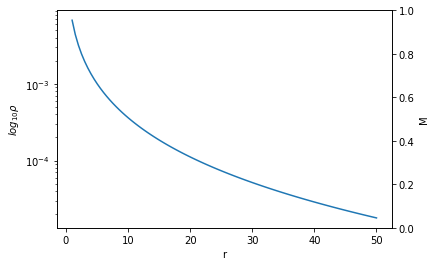

In [137]:
fig,ax1 = plt.subplots()
ax1.plot(x,y)
plt.xlabel('r')
plt.ylabel(r'$log_{10} \rho$')
plt.yscale('log')
ax2 = ax1.twinx()
ax2.set_ylabel('M')
#ax2.plot(x,m, color='g')
plt.show()

In [144]:
X=sp.Symbol('x')
a = sp.Symbol('a')
A=sp.Symbol('A')
f_expr=sp.exp(-A*X**a)
F_expr=sp.integrate(f_expr,X)

In [145]:
F_expr

A**(-1/a)*gamma(1/a)*lowergamma(1/a, A*x**a)/(a**2*gamma(1 + 1/a))

In [147]:
F=sp.lambdify([X],F_expr)

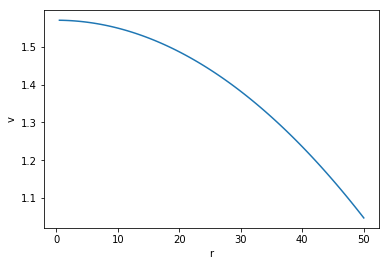

In [176]:
fig,ax1 = plt.subplots()
ax1.plot(x,phi)
plt.xlabel('r')
plt.ylabel('v')
plt.show()

In [175]:
phi

array([ 1.04719755,  1.05761717,  1.06793206,  1.07814224,  1.0882477 ,
        1.09824843,  1.10814445,  1.11793575,  1.12762232,  1.13720418,
        1.14668132,  1.15605374,  1.16532143,  1.17448441,  1.18354267,
        1.19249621,  1.20134503,  1.21008913,  1.21872851,  1.22726317,
        1.23569311,  1.24401833,  1.25223883,  1.26035461,  1.26836567,
        1.27627202,  1.28407364,  1.29177054,  1.29936272,  1.30685018,
        1.31423293,  1.32151095,  1.32868425,  1.33575284,  1.3427167 ,
        1.34957584,  1.35633027,  1.36297997,  1.36952496,  1.37596522,
        1.38230077,  1.38853159,  1.3946577 ,  1.40067908,  1.40659575,
        1.4124077 ,  1.41811492,  1.42371743,  1.42921522,  1.43460829,
        1.43989663,  1.44508026,  1.45015917,  1.45513336,  1.46000283,
        1.46476757,  1.4694276 ,  1.47398291,  1.4784335 ,  1.48277937,
        1.48702052,  1.49115695,  1.49518866,  1.49911565,  1.50293793,
        1.50665548,  1.51026831,  1.51377642,  1.51717981,  1.52

In [170]:
m1

array([ 52.35987756,  52.35204976,  52.32867107,  52.28989858,
        52.23588937,  52.16680051,  52.08278909,  51.98401218,
        51.87062686,  51.74279022,  51.60065934,  51.44439128,
        51.27414314,  51.09007199,  50.89233491,  50.68108899,
        50.45649129,  50.21869891,  49.96786891,  49.70415839,
        49.42772442,  49.13872407,  48.83731444,  48.52365259,
        48.19789561,  47.86020058,  47.51072458,  47.14962468,
        46.77705797,  46.39318153,  45.99815244,  45.59212777,
        45.1752646 ,  44.74772002,  44.3096511 ,  43.86121493,
        43.40256859,  42.93386914,  42.45527368,  41.96693928,
        41.46902303,  40.96168199,  40.44507326,  39.91935391,
        39.38468102,  38.84121167,  38.28910294,  37.72851191,
        37.15959566,  36.58251127,  35.99741582,  35.40446639,
        34.80382005,  34.1956339 ,  33.580065  ,  32.95727043,
        32.32740728,  31.69063263,  31.04710356,  30.39697714,
        29.74041045,  29.07756058,  28.40858461,  27.73

In [159]:
x

array([ 50. ,  49.5,  49. ,  48.5,  48. ,  47.5,  47. ,  46.5,  46. ,
        45.5,  45. ,  44.5,  44. ,  43.5,  43. ,  42.5,  42. ,  41.5,
        41. ,  40.5,  40. ,  39.5,  39. ,  38.5,  38. ,  37.5,  37. ,
        36.5,  36. ,  35.5,  35. ,  34.5,  34. ,  33.5,  33. ,  32.5,
        32. ,  31.5,  31. ,  30.5,  30. ,  29.5,  29. ,  28.5,  28. ,
        27.5,  27. ,  26.5,  26. ,  25.5,  25. ,  24.5,  24. ,  23.5,
        23. ,  22.5,  22. ,  21.5,  21. ,  20.5,  20. ,  19.5,  19. ,
        18.5,  18. ,  17.5,  17. ,  16.5,  16. ,  15.5,  15. ,  14.5,
        14. ,  13.5,  13. ,  12.5,  12. ,  11.5,  11. ,  10.5,  10. ,
         9.5,   9. ,   8.5,   8. ,   7.5,   7. ,   6.5,   6. ,   5.5,
         5. ,   4.5,   4. ,   3.5,   3. ,   2.5,   2. ,   1.5,   1. ,   0.5])